In [2]:
import numpy as np
import pandas as pd 


In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore') # To prevent kernel from showing any warning

In [5]:
df=pd.read_csv("IRIS.csv")
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [6]:
df.shape

(150, 5)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [8]:
df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [9]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [10]:
df['species'].value_counts()

species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64

<function matplotlib.pyplot.show(close=None, block=None)>

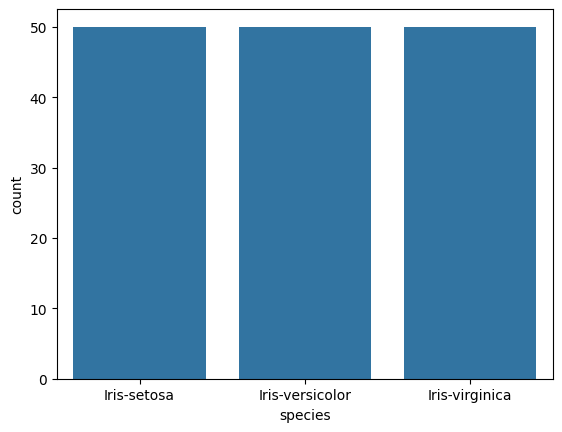

In [11]:
sns.countplot(x='species',data=df)
plt.show

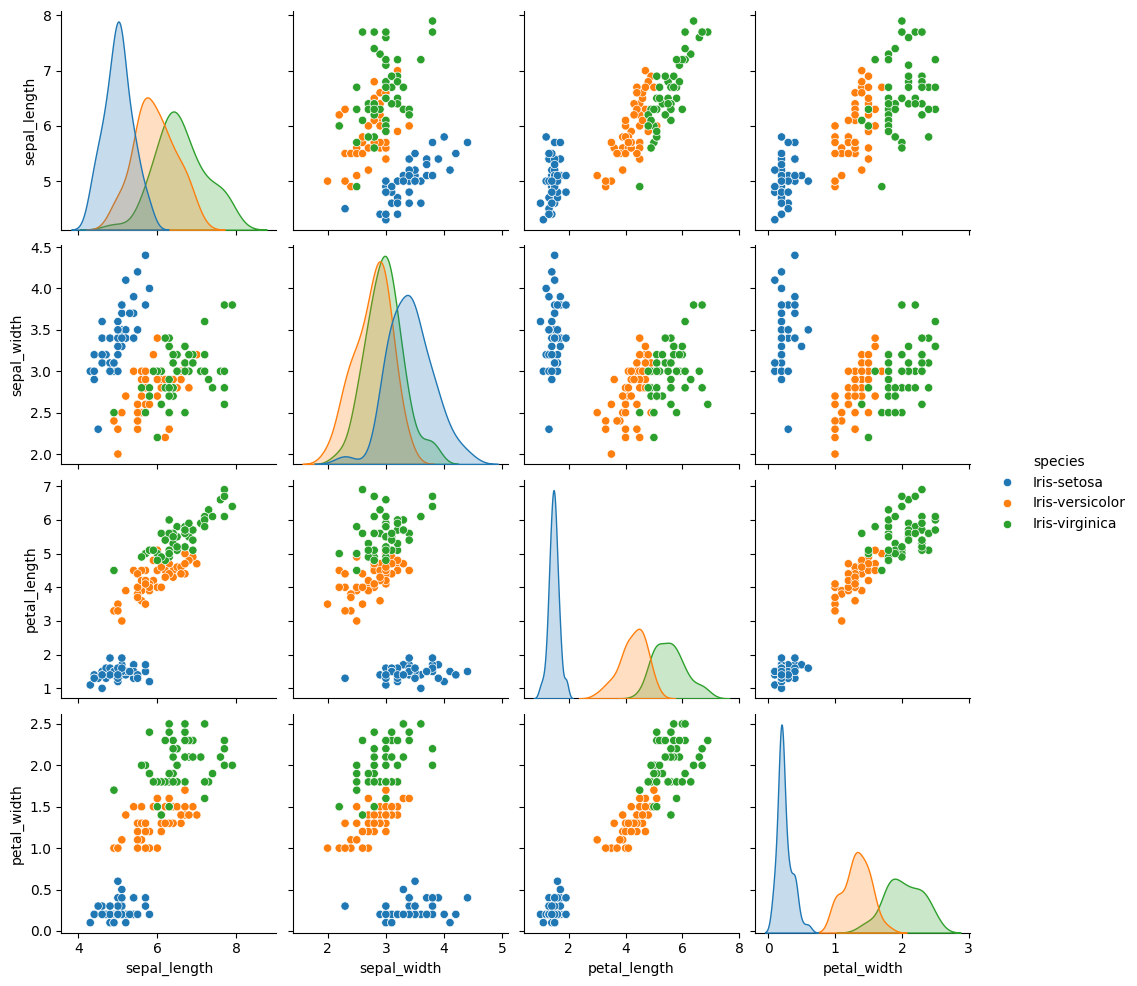

In [12]:
sns.pairplot(df,hue='species')
plt.show()

In [13]:
df['species'].replace({'Iris-setosa':0,'Iris-versicolor':1,'Iris-virginica':2}, inplace = True)

<Axes: >

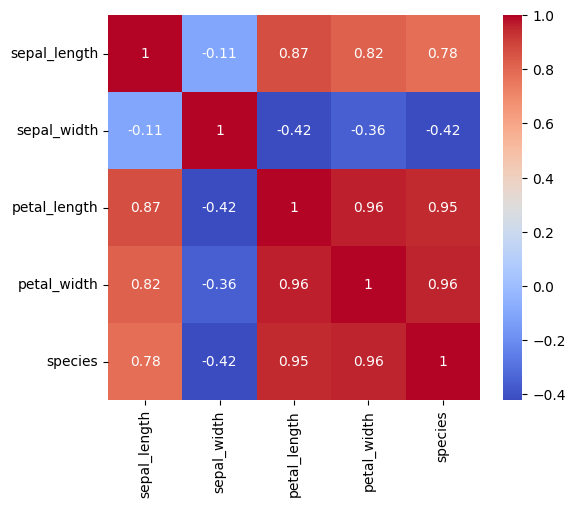

In [14]:
plt.figure(figsize=[6,5])
sns.heatmap(df.corr(),annot = True, cmap="coolwarm")

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [17]:
x_train, x_test, y_train, y_test = train_test_split(df.iloc[:,:-1], df['species'], test_size = 0.3, random_state = 30)

In [18]:
model = LogisticRegression()
model.fit(x_train,y_train)

LogisticRegression()

In [19]:
y_pred=model.predict(x_test)
y_pred

array([0, 0, 0, 2, 1, 1, 2, 2, 1, 2, 0, 2, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0,
       0, 0, 2, 2, 2, 2, 0, 1, 2, 1, 2, 2, 2, 2, 1, 2, 1, 2, 2, 2, 0, 1,
       2], dtype=int64)

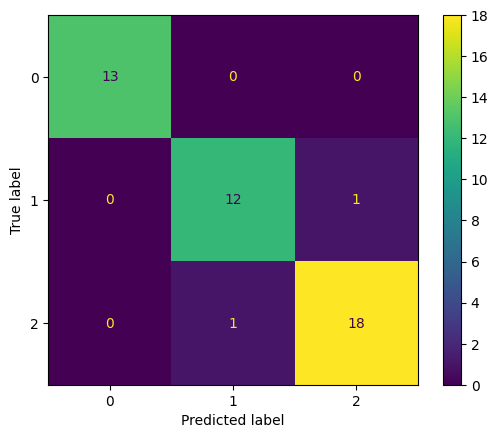

In [20]:
matrix=confusion_matrix(y_test,y_pred)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = matrix)

cm_display.plot()
plt.show()

In [21]:
report=classification_report(y_test,y_pred)
print(report)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       0.92      0.92      0.92        13
           2       0.95      0.95      0.95        19

    accuracy                           0.96        45
   macro avg       0.96      0.96      0.96        45
weighted avg       0.96      0.96      0.96        45



In [22]:
y_pred_train=model.predict(x_train)
acc_score=accuracy_score(y_train,y_pred_train)
print('Accuracy Score is : ',acc_score)

Accuracy Score is :  0.9904761904761905


DataFrame Head:


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0


DataFrame Tail:


,sepal_length,sepal_width,petal_length,petal_width,species
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2
149,5.9,3.0,5.1,1.8,2


----------------------------------------------------------------------------------------------------
Missing values:


,0


----------------------------------------------------------------------------------------------------
Shape of DataFrame:

(150, 5)

----------------------------------------------------------------------------------------------------
DataFrame Info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.0 KB
----------------------------------------------------------------------------------------------------
Describe DataFrame:



,count,mean,median,std,min,25%,50%,75%,max,skewness,kurtosis
sepal_length,150,5.843,5.8,0.828,4.3,5.1,5.8,6.4,7.9,0.311753,-0.573568
sepal_width,150,3.054,3,0.434,2,2.8,3,3.3,4.4,0.330703,0.241443
petal_length,150,3.759,4.35,1.764,1,1.6,4.35,5.1,6.9,-0.271712,-1.395359
petal_width,150,1.199,1.3,0.763,0.1,0.3,1.3,1.8,2.5,-0.103944,-1.335246
species,150,1,1,0.819,0,0,1,2,2,0.000000,-1.500000


----------------------------------------------------------------------------------------------------
DataFrame Correlation:



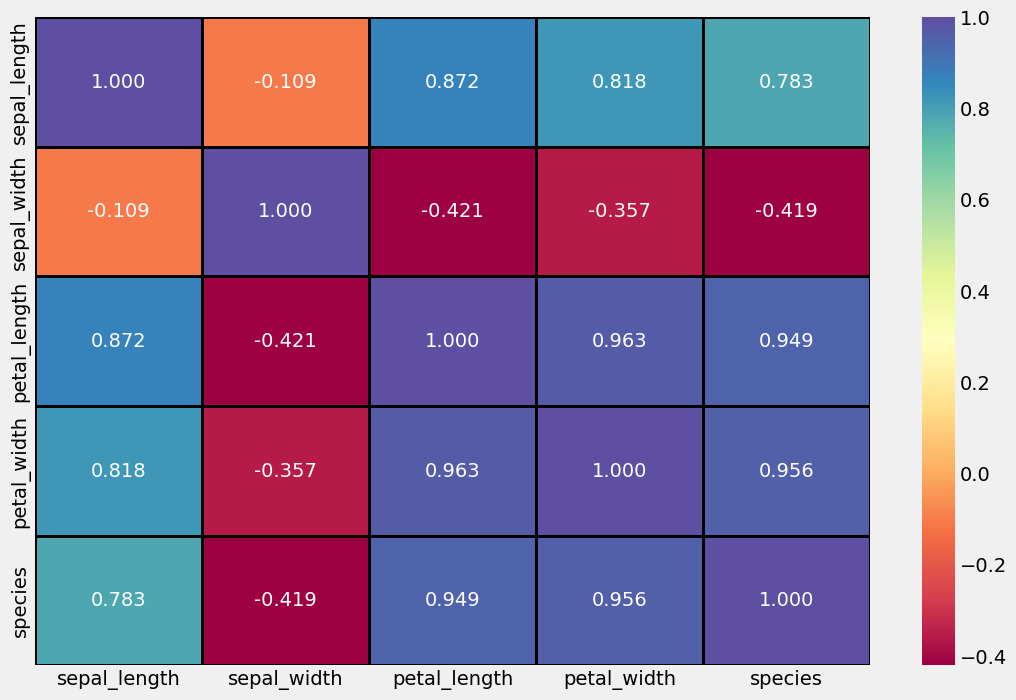

----------------------------------------------------------------------------------------------------
DataFrame Pairplot:



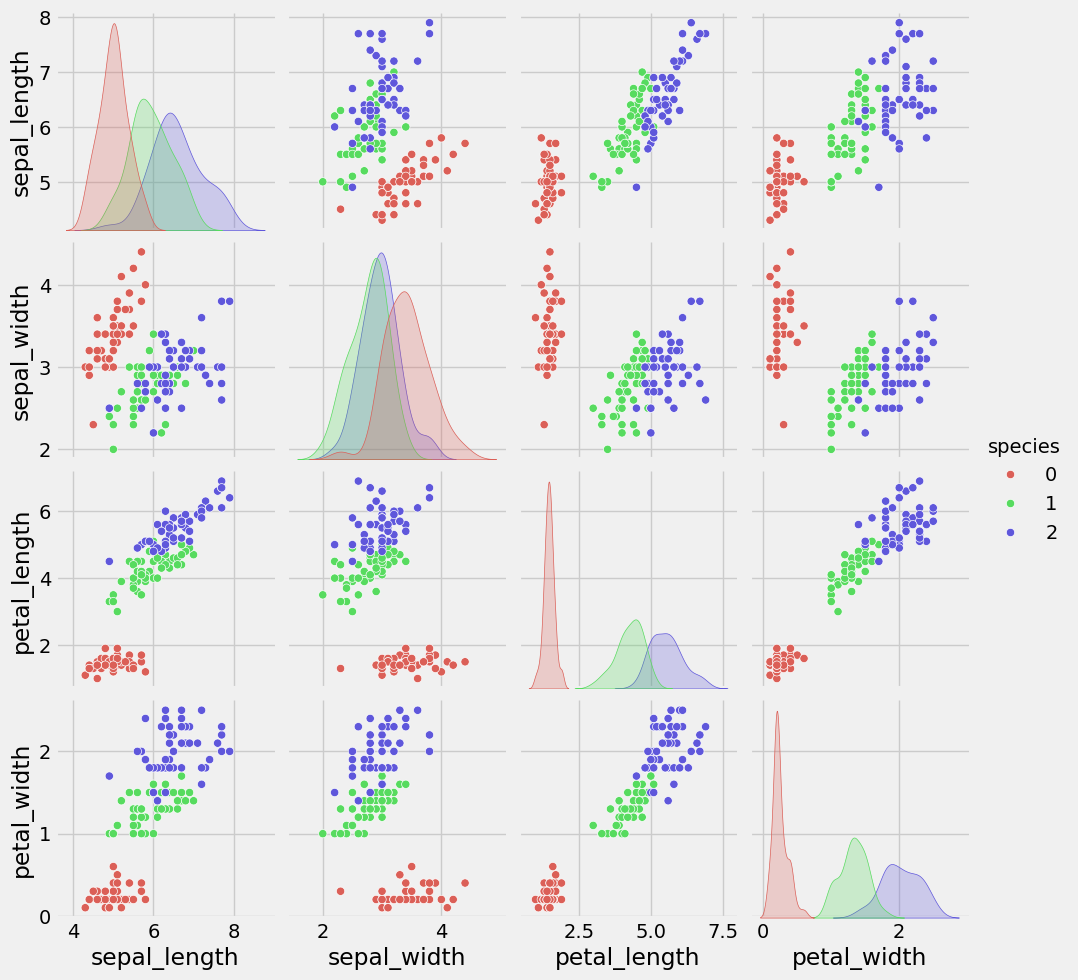

----------------------------------------------------------------------------------------------------
Histogram(s) & Boxplot(s):



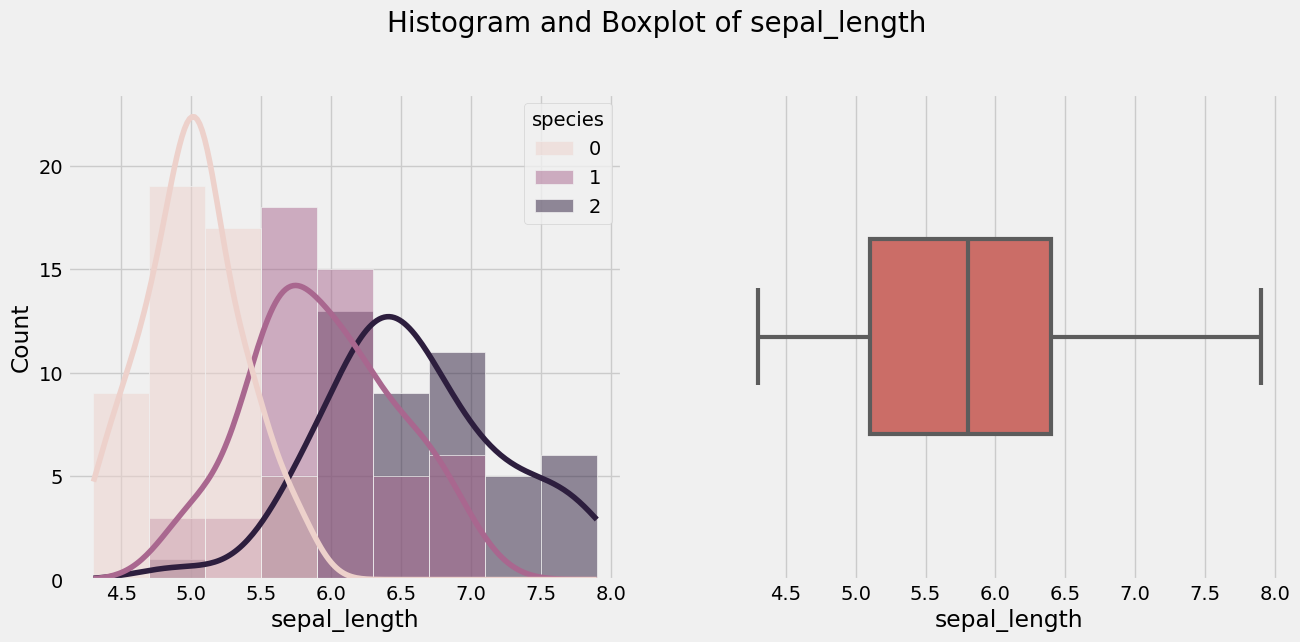

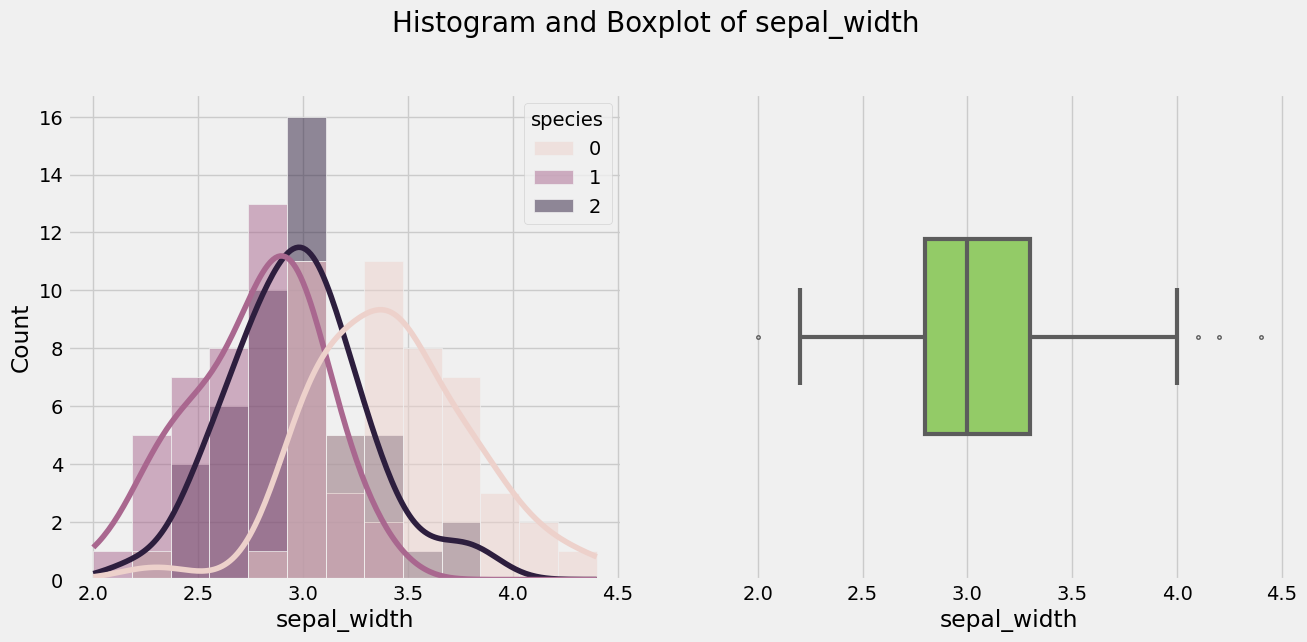

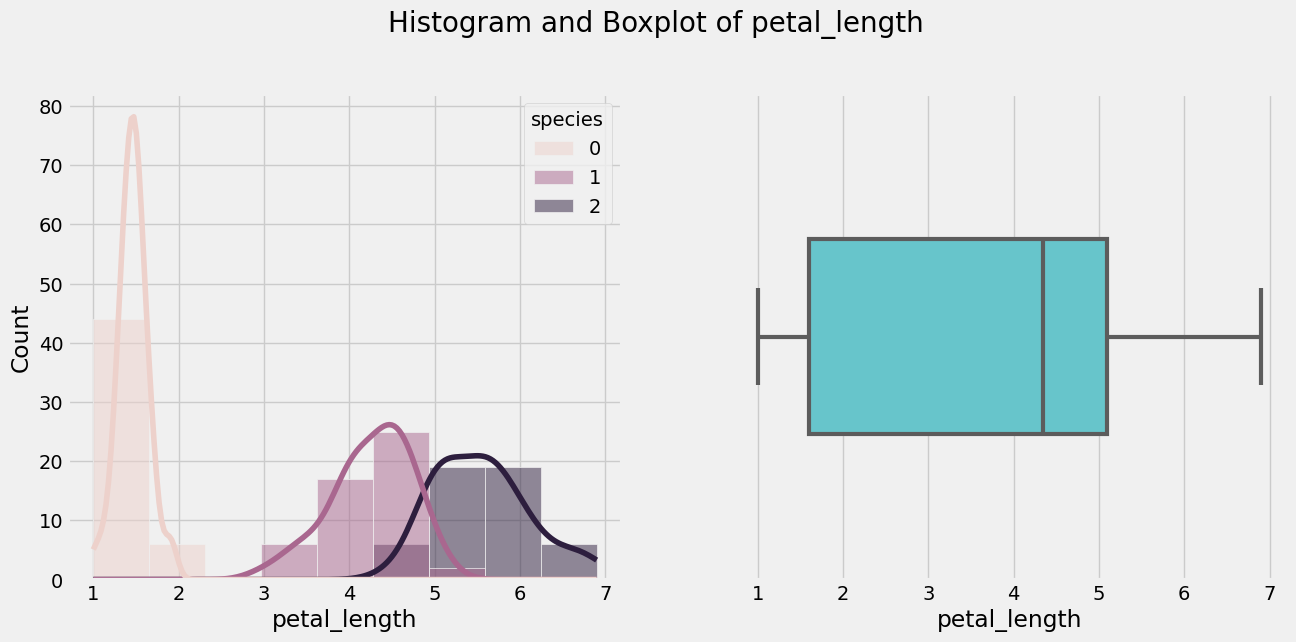

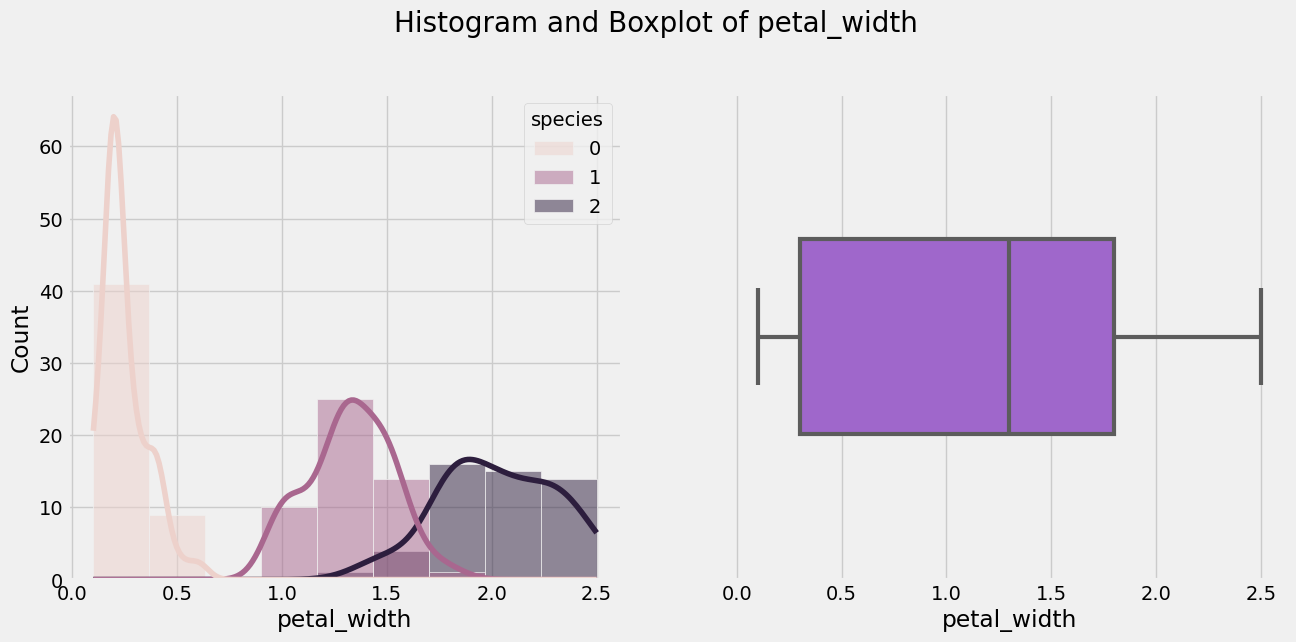

----------------------------------------------------------------------------------------------------
Countplot(s):



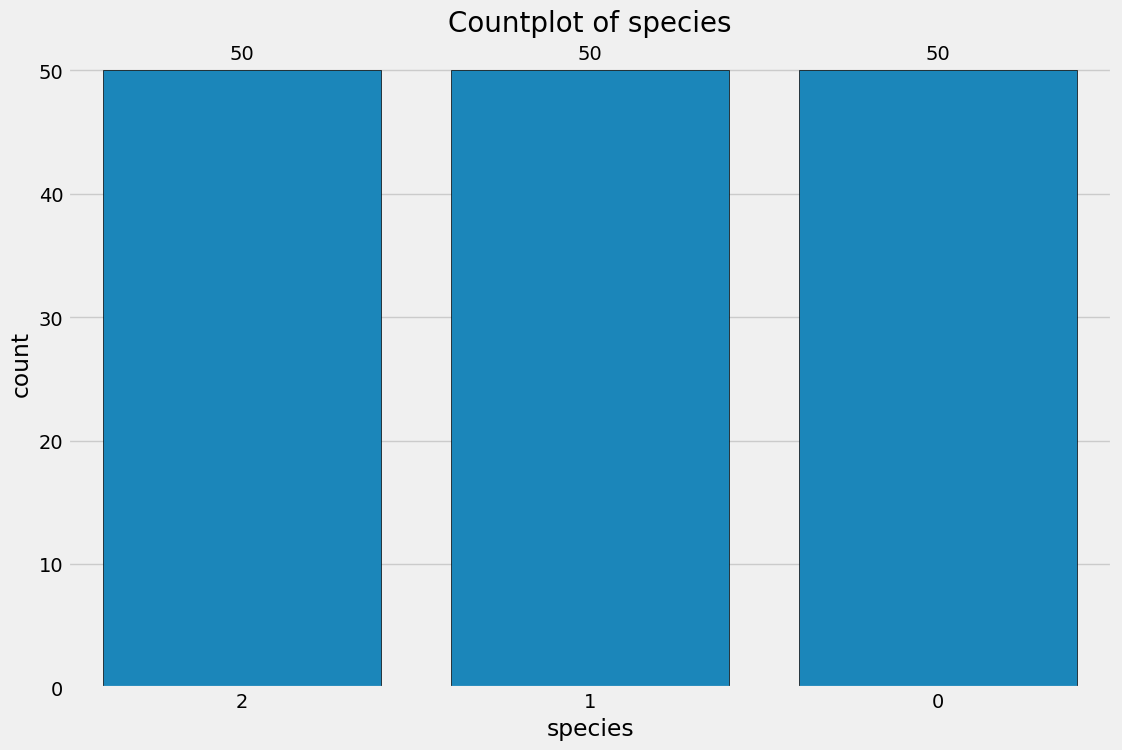

In [23]:
!pip install fasteda -q
from fasteda import fast_eda
fast_eda(df, target="species")